In [7]:
import screcode
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
h5_file = 'data/Parent_SC3v3_Human_Glioblastoma_filtered_feature_bc_matrix.h5'
input_h5 = h5py.File(h5_file,'r')
data = scipy.sparse.csc_matrix((input_h5['matrix']['data'],input_h5['matrix']['indices'],input_h5['matrix']['indptr']),shape=input_h5['matrix']['shape']).toarray().T
gene_list = [x.decode('ascii', 'ignore') for x in input_h5['matrix']['features']['name']]
cell_list = np.array([x.decode('ascii', 'ignore') for x in input_h5['matrix']['barcodes']],dtype=object)

In [4]:
%time data_scr,param = screcode.scRECODE(data,return_param=True)
print(param)

CPU times: user 14min 58s, sys: 9min 45s, total: 24min 44s
Wall time: 3min 43s
220


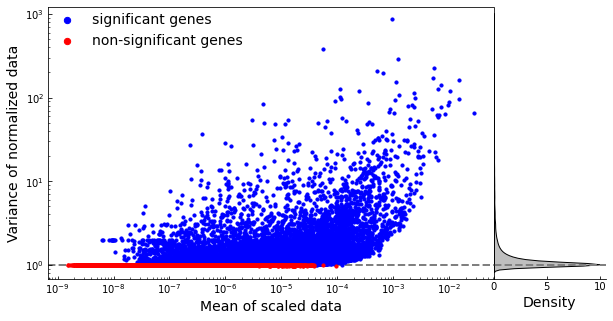

In [205]:
def scRECODE_check_applicability(
    data,
    title='',
    figsize=(10,5),
    ps = 10
):
    idx_gene = np.sum(data,axis=0) > 0
    data_scaled =(data.T/np.sum(data,axis=1)).T[:,idx_gene]
    noise_var = np.mean(data.T/np.sum(data,axis=1)/np.sum(data,axis=1),axis=1)[idx_gene]
    data_norm = (data_scaled-np.mean(data_scaled,axis=0))/np.sqrt(noise_var)
    x,y = np.mean(data_scaled,axis=0),np.var(data_norm,axis=0)
    idx_nonsig, idx_sig = y <= 1, y > 1
    fig = plt.figure(figsize=figsize)
    spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[4, 1],wspace=0)
    ax0 = fig.add_subplot(spec[0])
    ax0.scatter(x[idx_sig],y[idx_sig],color='b',s=ps,label='significant genes',zorder=2)
    ax0.scatter(x[idx_nonsig],y[idx_nonsig],color='r',s=ps,label='non-significant genes',zorder=3)
    ax0.axhline(1,color='gray',ls='--',lw=2,zorder=1)
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_title(title,fontsize=14)
    ax0.set_xlabel('Mean of scaled data',fontsize=14)
    ax0.set_ylabel('Variance of normalized data',fontsize=14)
    ax0.legend(loc='upper left',borderaxespad=0,fontsize=14,markerscale=2).get_frame().set_alpha(0)
    ylim = ax0.set_ylim()
    ax1 = fig.add_subplot(spec[1])
    sns.kdeplot(y=np.log10(y), color='k',shade=True,ax=ax1)
    ax1.axhline(0,c='gray',ls='--',lw=2,zorder=1)
    ax1.set_ylim(np.log10(ax0.set_ylim()))
    ax1.tick_params(labelbottom=True,labelleft=False,bottom=True)
    ax1.set_xlabel('Density',fontsize=14)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.tick_params(left=False)
    plt.show()

scRECODE_check_applicability(data)

In [148]:
idx_gene = np.sum(data,axis=0) > 0
data_scaled =(data.T/np.sum(data,axis=1)).T[:,idx_gene]
noise_var = np.mean(data.T/np.sum(data,axis=1)/np.sum(data,axis=1),axis=1)[idx_gene]
data_norm = (data_scaled-np.mean(data_scaled,axis=0))/np.sqrt(noise_var)
x,y = np.mean(data_scaled,axis=0),np.var(data_norm,axis=0)

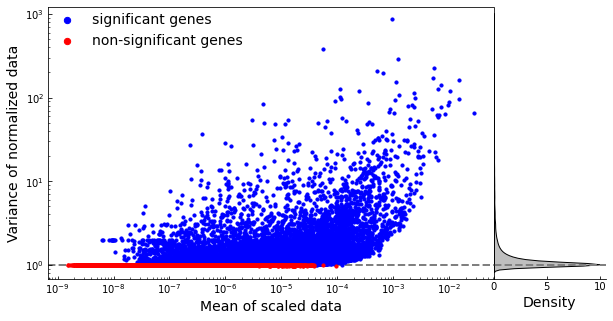

In [202]:
import matplotlib

title=''
figsize=(10,5)
ps = 10


idx_nonsig = y <= 1
idx_sig = y > 1
fig = plt.figure(figsize=figsize)
spec = matplotlib.gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[4, 1],wspace=0)
ax0 = fig.add_subplot(spec[0])
ax0.scatter(x[idx_sig],y[idx_sig],color='b',s=ps,label='significant genes',zorder=2)
ax0.scatter(x[idx_nonsig],y[idx_nonsig],color='r',s=ps,label='non-significant genes',zorder=3)
ax0.axhline(1,color='gray',ls='--',lw=2,zorder=1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_title(title,fontsize=14)
ax0.set_xlabel('Mean of scaled data',fontsize=14)
ax0.set_ylabel('Variance of normalized data',fontsize=14)
ax0.legend(loc='upper left',borderaxespad=0,fontsize=14,markerscale=2).get_frame().set_alpha(0)
ylim = ax0.set_ylim()
ax1 = fig.add_subplot(spec[1])
sns.kdeplot(y=np.log10(y), color='k',shade=True,ax=ax1)
ax1.axhline(0,c='gray',ls='--',lw=2,zorder=1)
ax1.set_ylim(np.log10(ax0.set_ylim()))
ax1.tick_params(labelbottom=True,labelleft=False,bottom=True)
ax1.set_xlabel('Density',fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(left=False)
plt.show()


In [63]:
n_slct = 500
d_slct = 10000
data_slct = data[:n_slct,:d_slct]

In [133]:
import importlib
importlib.reload(screcode)
%time data_slct_scRECODE,param_slct = screcode.scRECODE(return_param=True).fit_transform(data_slct)
print(param_slct)

CPU times: user 5.93 s, sys: 8.92 s, total: 14.8 s
Wall time: 2.43 s
{'#significant genes': 3480, '#non-significant genes': 2637, '#silent genes': 3883, 'ell': 45}


In [130]:
import importlib
importlib.reload(screcode)
%time data_scRECODE,param = screcode.scRECODE(return_param=True).fit_transform(data)
print(param)

CPU times: user 26min 37s, sys: 10min 49s, total: 37min 27s
Wall time: 5min 45s
{'#significant genes': 17690, '#non-significant genes': 10200, '#silent genes': 0, 'ell': 218}


In [291]:
import importlib
importlib.reload(screcode)
%time data_scRECODE,param = screcode.scRECODE(return_param=True).fit_transform(data)
print(param)

start scRECODE
end scRECODE
parameter: {'#significant genes': 17690, '#non-significant genes': 10200, '#silent genes': 8711, 'ell': 218, 'elapsed_time': '82.5726[sec]'}
CPU times: user 2min 49s, sys: 1min 11s, total: 4min
Wall time: 1min 22s
{'#significant genes': 17690, '#non-significant genes': 10200, '#silent genes': 8711, 'ell': 218, 'elapsed_time': '82.5726[sec]'}


In [340]:
import importlib
importlib.reload(screcode)
screcode_slct = screcode.scRECODE()
data_scRECODE = screcode_slct.fit_transform(data_slct)

start scRECODE
end scRECODE
parameter: {'#significant genes': 3480, '#non-significant genes': 2637, '#silent genes': 3883, 'ell': 45, 'elapsed_time': '2.3955[sec]'}


In [320]:
raise ValueError("the tested rank should be in [1, n_features - 1]")

ValueError: the tested rank should be in [1, n_features - 1]

In [323]:
import warnings
warnings.warn("Acceleration error: the ell value may not be optimal. Set 'acceleration=False' in scRECODE.\nEx. X_new = screcode.scRECODE(acceleration=False).fit_transform(X)")

/home/yusuke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Acceleration error: the ell value may not be optimal. Set 'acceleration=False' in scRECODE.
Ex. X_new = screcode.scRECODE(acceleration=False).fit_transform(X)
  


start scRECODE
end scRECODE
parameter: {'#significant genes': 3480, '#non-significant genes': 2637, '#silent genes': 3883, 'ell': 45, 'elapsed_time': '2.5347[sec]'}


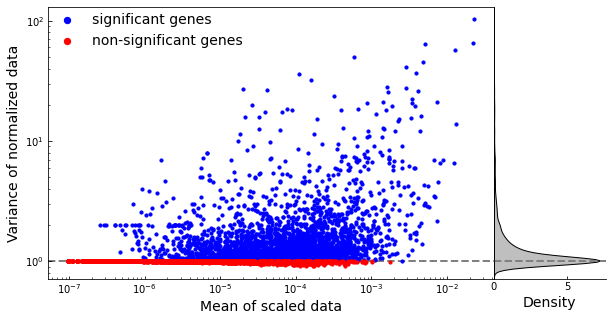

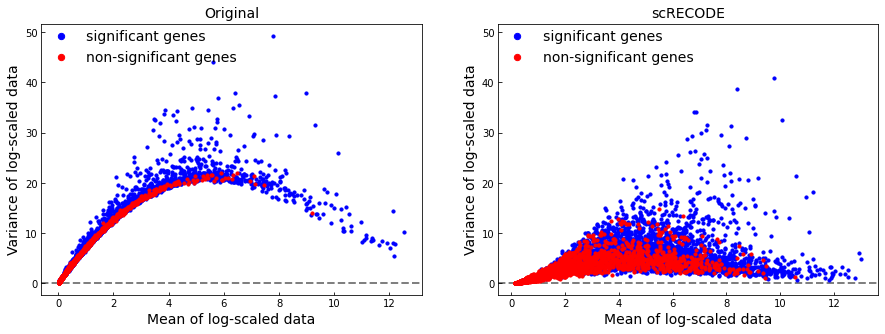

In [290]:
import importlib
importlib.reload(screcode)
screcode_slct = screcode.scRECODE()
data_slct_scRECODE = screcode_slct.fit_transform(data_slct)
screcode_slct.check_applicability()
screcode_slct.compare_mean_variance_log()

In [227]:
idx_gene = np.sum(data,axis=0) > 0
data_scaled =(data.T/np.sum(data,axis=1)).T
noise_var = np.mean(data.T/np.sum(data,axis=1)/np.sum(data,axis=1),axis=1)
noise_var[noise_var==0] = 1
data_norm = (data_scaled-np.mean(data_scaled,axis=0))/np.sqrt(noise_var)

In [234]:
import importlib
importlib.reload(screcode)






In [251]:
idx_nonsig = (np.var(data_norm,axis=0) <= 1) & (np.var(data_norm,axis=0) > 0)

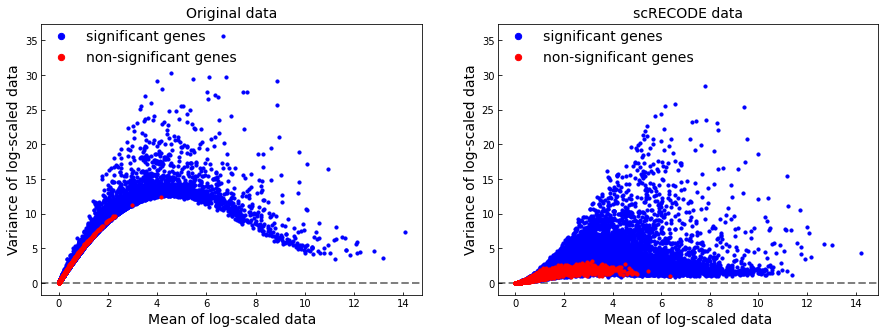

In [247]:
figsize = (15,5)
idx_nonsig, idx_sig = np.var(data_norm,axis=0) <= 1, np.var(data_norm,axis=0) > 1
fig = plt.figure(figsize=figsize)
ax0 = fig.add_subplot(1,2,1)
x,y = np.mean(data_ss_log,axis=0),np.var(data_ss_log,axis=0)
ax0.scatter(x[idx_sig],y[idx_sig],color='b',s=ps,label='significant genes',zorder=2)
ax0.scatter(x[idx_nonsig],y[idx_nonsig],color='r',s=ps,label='non-significant genes',zorder=3)
ax0.axhline(0,color='gray',ls='--',lw=2,zorder=1)
ax0.set_xlabel('Mean of log-scaled data',fontsize=14)
ax0.set_ylabel('Variance of log-scaled data',fontsize=14)
ax0.set_title('Original data',fontsize=14)
ax0.legend(loc='upper left',borderaxespad=0,fontsize=14,markerscale=2).get_frame().set_alpha(0)
ax1 = fig.add_subplot(1,2,2)
x,y = np.mean(data_scRECODE_ss_log,axis=0),np.var(data_scRECODE_ss_log,axis=0)
ax1.scatter(x[idx_sig],y[idx_sig],color='b',s=ps,label='significant genes',zorder=2)
ax1.scatter(x[idx_nonsig],y[idx_nonsig],color='r',s=ps,label='non-significant genes',zorder=3)
ax1.set_ylim(ax0.set_ylim())
ax1.axhline(0,color='gray',ls='--',lw=2,zorder=1)
ax1.set_xlabel('Mean of log-scaled data',fontsize=14)
ax1.set_ylabel('Variance of log-scaled data',fontsize=14)
ax1.set_title('scRECODE data',fontsize=14)
ax1.legend(loc='upper left',borderaxespad=0,fontsize=14,markerscale=2).get_frame().set_alpha(0)
plt.show()